# Example Alternative Growth Fit

Please first see the other Jupyter Notebook, explaining the basics of accessing mycelyso's HDF5 files.
Furthermore, this file assumes the `output.h5` described in the other notebook to be present in the current directory.

Within this notebook, we will fit the mycelium length data using a third-party library, [*croissance*](https://github.com/biosustain/croissance) (DOI: [10.5281/zenodo.229905](https://dx.doi.org/10.5281/zenodo.229905) by Lars Schöning (2017)). Please install the current version off github first: 
```
pip install https://github.com/biosustain/croissance/archive/master.zip
```
First, some general setup …

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats=['svg']
import pandas
pandas.options.display.max_columns = None
import numpy as np
import warnings
import croissance
from croissance.figures import PDFWriter as CroissancePDFWriter
from matplotlib import pyplot

class OutputInstead:
    @classmethod
    def savefig(cls, fig):
        pyplot.gcf().set_size_inches(10, 12)
        pyplot.show()
        
# croissance's PDFWriter is supposed to write to a PDF
# but we want an inline figure, so we mock some bits
CroissancePDFWriter.doc = OutputInstead
CroissancePDFWriter._include_shifted_exponentials = False
def display_result(result, name="Mycelium Length"):
    return CroissancePDFWriter.write(CroissancePDFWriter, name, result)

warnings.simplefilter(action='ignore', category=FutureWarning)

pyplot.rcParams.update({
    'figure.figsize': (10, 6), 'svg.fonttype': 'none',
    'font.sans-serif': 'Arial', 'font.family': 'sans-serif',
    'image.cmap': 'gray_r', 'image.interpolation': 'none'
})

## Opening the HDF5 file
We will load the `output.h5` using `pandas.HDFStore` …

In [2]:
store = pandas.HDFStore('output.h5', 'r')
root = store.get_node('/')
for image_file in root.results:
    print(image_file)
    for position in image_file:
        print(position)
        break

/results/mycelyso_S_lividans_TK24_Complex_Medium_nd046_138_ome_tiff (Group) ''
/results/mycelyso_S_lividans_TK24_Complex_Medium_nd046_138_ome_tiff/pos_000000000_t_Collected (Group) ''


and load the first growth curve

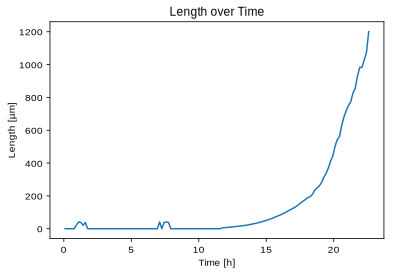

In [3]:
result_table_collected = store[position.result_table_collected._v_pathname]
timepoint = result_table_collected.timepoint / (60*60)
length = result_table_collected.graph_edge_length

pyplot.title('Length over Time')

pyplot.xlabel('Time [h]')
pyplot.ylabel('Length [µm]')

pyplot.plot(timepoint, length)

Here, we will use the third party tool `croissance` to fit the data to an exponential growth model:

In [4]:
curve = pandas.Series(data=np.array(length), index=np.array(timepoint))

estimator = croissance.Estimator()
result = estimator.growth(curve)
# print(result)
print(result.growth_phases)

[GrowthPhase(start=9.928127173487246, end=22.594538504723342, slope=0.36693539043981077, intercept=3.1588539520729086, n0=-25.525547240977755, attributes={'SNR': 172.5009988033075, 'rank': 100.0})]


And furthermore use its plotting functionality to show the results:

Growth rate as determined by croissance µ=0.37


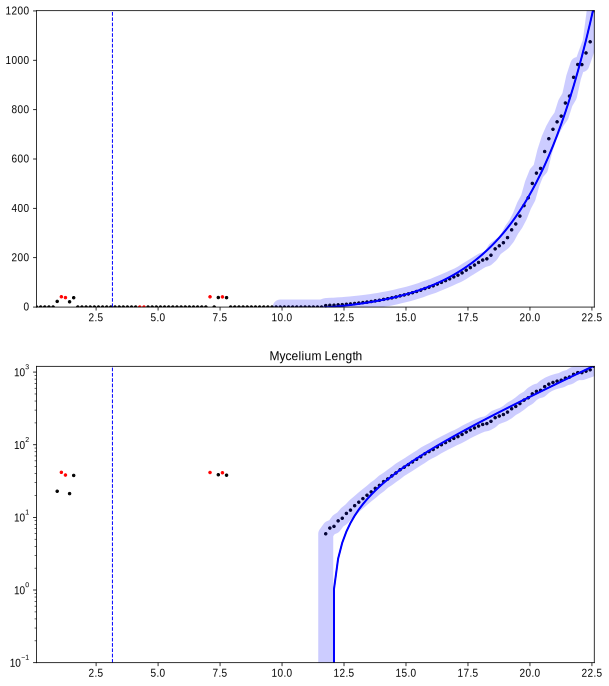

In [5]:
print("Growth rate as determined by croissance µ=%.2f" % (result.growth_phases[0].slope,))
display_result(result)